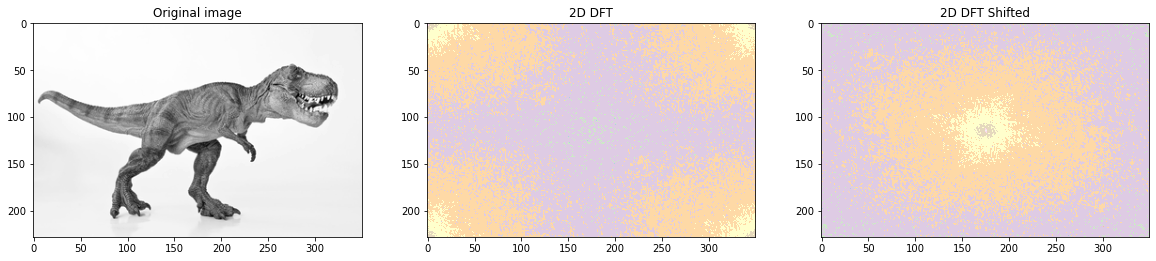

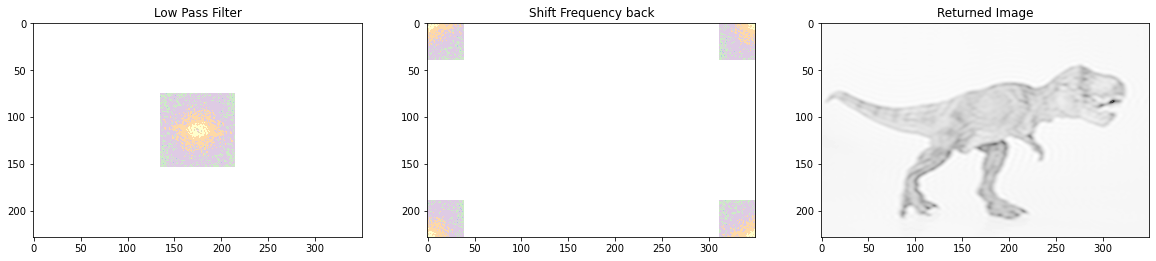

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Open an image and show
path = r'images/trex.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
Mdft = 20*np.log(cv2.magnitude(dft[:,:,0],dft[:,:,1]))
Mdft_shift = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

#Plot image
fig1 = plt.figure(figsize=(20, 5))
ax1 = fig1.add_subplot(1,3,1)
ax1.set(title='Original image')
ax1.imshow(image, cmap='gray')
ax2 = fig1.add_subplot(1,3,2)
ax2.set(title='2D DFT')
ax2.imshow(Mdft, cmap='Pastel1')
ax3 = fig1.add_subplot(1,3,3)
ax3.set(title='2D DFT Shifted')
ax3.imshow(Mdft_shift, cmap='Pastel1')

# find center point
rows, cols = image.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
#mask = np.zeros((rows,cols,2),np.uint8)
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-40:crow+40, ccol-40:ccol+40] = 1

# apply mask and inverse DFT
masked_f = dft_shift*mask
masked_shift = np.fft.ifftshift(masked_f)
np.seterr(divide = 'ignore') #turnoff warning divided by zero 
Mmasked_f = 20*np.log(cv2.magnitude(masked_f[:,:,0], masked_f[:,:,1]))
Mmasked_shift = 20*np.log(cv2.magnitude(masked_shift[:,:,0], masked_shift[:,:,1]))
np.seterr(divide = 'warn') #turnon warning divided by zero
img_back = cv2.idft(masked_shift)
img_back = 20*np.log(cv2.magnitude(img_back[:,:,0], img_back[:,:,1]))

#Plot image
fig2 = plt.figure(figsize=(20, 5))
ax1 = fig2.add_subplot(1,3,1)
ax1.set(title='Low Pass Filter')
ax1.imshow(Mmasked_f, cmap='Pastel1')
ax2 = fig2.add_subplot(1,3,2)
ax2.set(title='Shift Frequency back')
ax2.imshow(Mmasked_shift, cmap='Pastel1')
ax3 = fig2.add_subplot(1,3,3)
ax3.set(title='Returned Image')
ax3.imshow(img_back, cmap='gray')